In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file in Drive
FILEPATH = "/content/drive/MyDrive/VOIS_PROJECT/Airbnb_Open_Data.xlsx"

# Read Excel
df = pd.read_excel(FILEPATH)

# Clean column names
df.columns = [c.strip().lower() for c in df.columns]

df.head()



Mounted at /content/drive


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [2]:
# Basic info about dataset
df.info()

# Summary statistics
df.describe()

# Check null values
df.isnull().sum()

# Look at unique room types (property types)
print("Room types:", df['room type'].unique())
print("Neighbourhood groups:", df['neighbourhood group'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
dtype: int64


/tmp/ipython-input-2470280733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Blues_d')


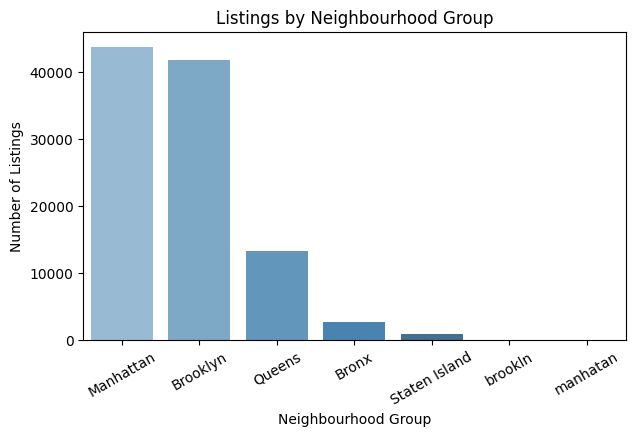

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count listings
counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
print(counts)

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=counts.index, y=counts.values, palette='Blues_d')
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.show()


neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


/tmp/ipython-input-1613268630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='Greens_d')


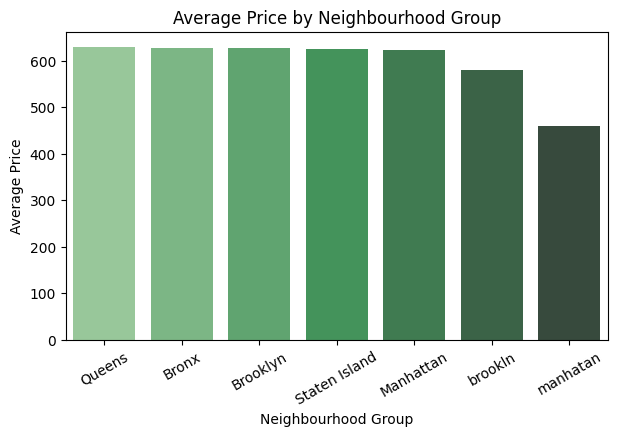

In [4]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print(avg_price)

plt.figure(figsize=(7,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Greens_d')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=30)
plt.show()


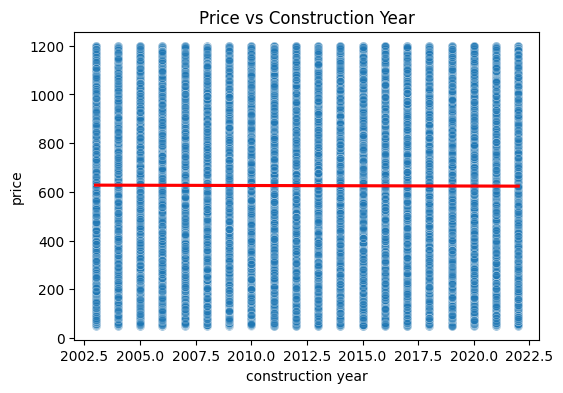

In [5]:
df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='construction year', y='price', alpha=0.3)
sns.regplot(data=df, x='construction year', y='price', scatter=False, color='red')
plt.title('Price vs Construction Year')
plt.show()


host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


/tmp/ipython-input-603888060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')


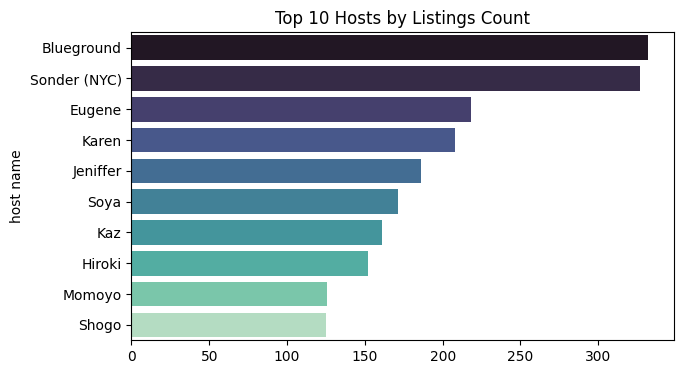

In [6]:
host_counts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(host_counts)

plt.figure(figsize=(7,4))
sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')
plt.title('Top 10 Hosts by Listings Count')
plt.show()


host_identity_verified
verified       0.457640
unconfirmed    0.452754
Name: positive_review, dtype: float64


/tmp/ipython-input-3159271988.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')


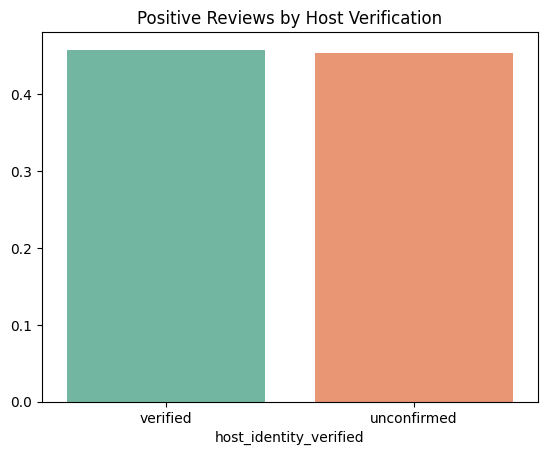

In [7]:
import numpy as np

df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
id_rate = df.groupby('host_identity_verified')['positive_review'].mean().sort_values(ascending=False)
print(id_rate)

sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')
plt.title('Positive Reviews by Host Verification')
plt.show()


Correlation: 0.9999908755543448


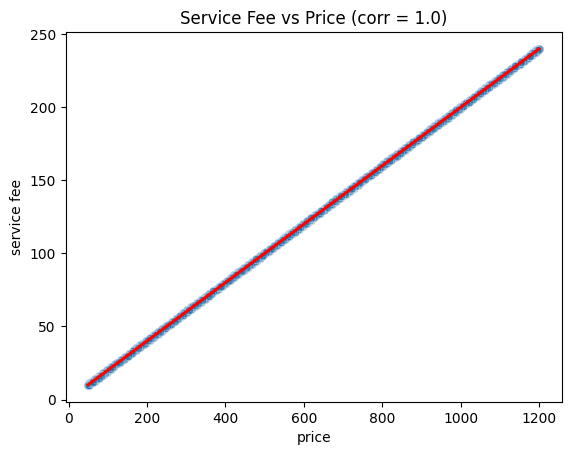

In [8]:
corr_val = df[['price','service fee']].corr().iloc[0,1]
print("Correlation:", corr_val)

sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
sns.regplot(data=df, x='price', y='service fee', scatter=False, color='red')
plt.title(f'Service Fee vs Price (corr = {round(corr_val,3)})')
plt.show()


room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333
brookln                          NaN         NaN      4.000000          NaN
manhatan                         NaN         NaN      3.000000          NaN


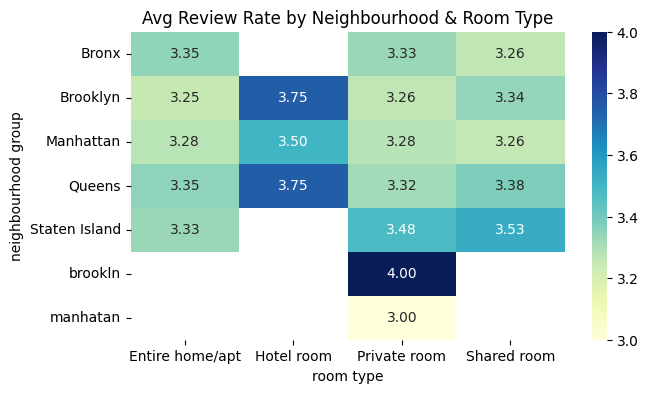

In [9]:
pivot_rt = df.pivot_table(index='neighbourhood group', columns='room type',
                          values='review rate number', aggfunc='mean')
print(pivot_rt)

plt.figure(figsize=(7,4))
sns.heatmap(pivot_rt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Avg Review Rate by Neighbourhood & Room Type')
plt.show()



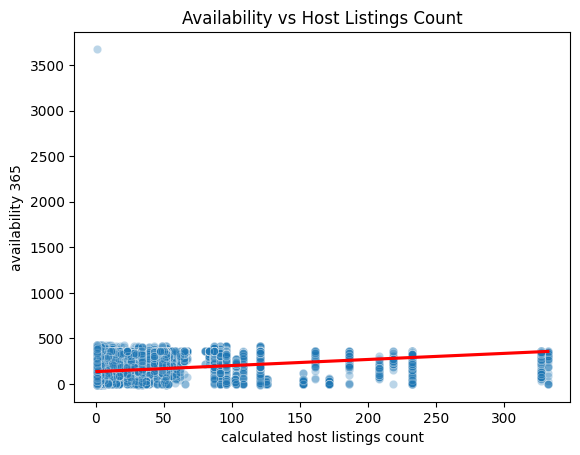

In [10]:
sns.scatterplot(data=df, x='calculated host listings count', y='availability 365', alpha=0.3)
sns.regplot(data=df, x='calculated host listings count', y='availability 365', scatter=False, color='red')
plt.title('Availability vs Host Listings Count')
plt.show()
